# DRAS scenario generation


### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [1]:
import pandas as pd
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 2)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [2]:
instance_dir = '../dras-controller/instances/'

ins_file = 'ins'
ref_file = 'ref'
w_file = 'w'


INS   
1 5 // client-number server-number  
5 0.5 0.5 1 1 // client-server-number PAND PAD CRND CND  
800 20 1 // schedule-duration interval-number kw-dolar  

# example5

the secenarios are generated from swf files



In [3]:
example = 'random-grande'
numpy.random.seed(seed=111)

## ins

In [28]:
C = 1
R = 30
schedule_duration  = 3600
K = 60
file_name = instance_dir + example + '/'+  ins_file
 
d = {'C': [C], 'R': [R]}
first = pd.DataFrame(data=d)
first_name = file_name + "_tmp1"
first.to_csv(first_name, sep=' ', encoding='utf-8', index=False, header=False)


d = {'RN': [int(R/C) for i in range(C)], 
     'PAND': [0.5 for i in range(C)],
     'PAD': [0.5 for i in range(C)],
     'CRND': [1 for i in range(C)], 
     'CRD': [1 for i in range(C)]}

second = pd.DataFrame(data=d)
second_name = file_name + "_tmp2"
second.to_csv(second_name, sep=' ', encoding='utf-8', index=False, header=False)

d = {'schedule_duration': [schedule_duration],
     'K': [K],
     'kwdolar': [0]
    }
third = pd.DataFrame(data=d)
third_name = file_name + "_tmp3"
third.to_csv(third_name, sep=' ', encoding='utf-8', index=False, header=False)

filenames = [first_name,second_name,third_name]
with open(file_name, 'w') as outfile:
    for fname in filenames:    
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
        os.remove(fname)
        

## w



In [31]:
base_loss = 1
offset_loss = 50
W = 500 * 3 * 10
base_task_mips = 60*1000
factor_task_mips = 3
deadline_factor = 60


numpy.random.seed(seed=111)

for clientId in range(C): 

    # read from worload exp1
    data = pd.DataFrame() 
    data['arriveTime'] = numpy.random.randint(0,3600, size=W)


    data = data.sort_values(by=['arriveTime'])
    data['type'] = numpy.random.randint(0,1 + 1, size=W )
    data['mips'] = numpy.random.randint(base_task_mips,base_task_mips*factor_task_mips, size=W)

    server_mips = 1000

    data['deadline'] = data.apply(lambda e: random.randint(e.mips/server_mips , e.mips/server_mips * deadline_factor)
                                  ,axis = 1) 

    data['loss'] = numpy.random.randint(base_loss,base_loss + offset_loss + 1, size=W)
    

    file_name = instance_dir + example + '/'+  w_file
    file_name_client = file_name + str(clientId)    
    d = {'W': [W]}
    first = pd.DataFrame(data=d)
    first_name = file_name_client + "_tmp1"
    first.to_csv(first_name, sep=' ', encoding='utf-8', index=False, header=False)
    d = {'clientId': [clientId for i in range(W)], 
         'mips': data['mips'],
         'arriveTime': data['arriveTime'],
         'deadline': data['deadline'], 
         'deferable': [1 for i in range(W)],
         'loss':  data['loss'],
         'type': data['type']    
        }
    second = pd.DataFrame(data=d) 
    second_name = file_name_client + "_tmp2"
    second.to_csv(second_name, sep=' ', encoding='utf-8', index=False, header=False)

    filenames = [first_name,second_name]
    with open(file_name_client, 'w') as outfile:
        for fname in filenames:    
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                os.remove(fname)



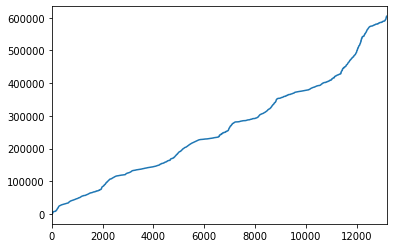

In [6]:
filename = '/home/jmurana/code/cloudsim-cecal/workload/jobType/30 weeks/exp5.swf'
data = pd.read_csv(filename, header=None,sep='\t',skiprows=0,)
data.columns = [
    'x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8', 
     'x9', 'x10','x11', 'x12','x13', 'x14','x15', 'x16',
                'x17','x18', 'x19','x20', 'x21','x22', 'x23',]

data['x2'].plot()